In [10]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from selectivesearch import selective_search

In [8]:
def normalize(x):
    return (x.astype(float) - 128) / 128

def preprocess(img):
    return normalize(cv2.cvtColor(cv2.resize(img, (224,224)), cv2.COLOR_BGR2RGB))

In [2]:
X_test = np.load('X_test.npy')

In [3]:
y_test = np.load('y_test.npy')

In [4]:
model = tf.keras.models.load_model('model.h5')

In [5]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [6]:
model.evaluate(X_test, y_test)

150/150 [==============================] - 5s 30ms/sample - loss: 0.1429 - accuracy: 0.9400


[0.14287580460309982, 0.94]

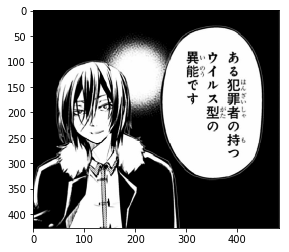

In [49]:
img = cv2.imread('samples/sample3.png')
plt.imshow(img)

In [50]:
img_lbl, regions = selective_search(img, scale=500, sigma=0.9, min_size=10)
len(regions)

531

In [51]:
rois = []
boxes = []
for r in regions:
    (x,y,w,h) = r['rect']
    roi = img[y:y+h, x:x+w]
    try:
        roi = preprocess(roi)
    except:
        continue
    boxes.append((x,y,w,h))
    rois.append(roi)

In [52]:
rois = np.asarray(rois)
rois.shape

(500, 224, 224, 3)

In [53]:
preds = model.predict(rois)

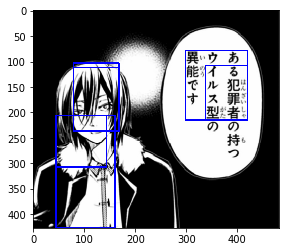

In [59]:
res = img.copy()
for i, p in enumerate(preds):
    acc = p[p.argmax()]
    if acc > 0.999:
        (x,y,w,h) = boxes[i]
        cv2.rectangle(res, (x,y), (x+w,y+h), (0, 0, 255), 2)
#         title = "class {} acc: {}".format(p.argmax(), acc)
#         plt.title(title)
#         plt.imshow(rois[i])
#         plt.show()
plt.imshow(res)